In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df.Age.isnull().sum()

177

In [5]:
df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
df[df.Age.isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [8]:
median = df.Age.median()
median

28.0

In [9]:
impute_nan(df,"Age",median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [10]:
import matplotlib as plt
%matplotlib inline

<AxesSubplot: ylabel='Density'>

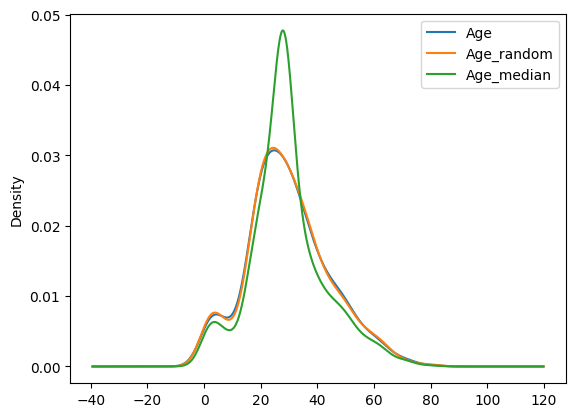

In [11]:
df['Age'].plot(kind='kde',legend=True)
df['Age_random'].plot(kind='kde',legend=True)
df['Age_median'].plot(kind='kde',legend=True)

# Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [12]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
import numpy as np
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)

In [14]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [15]:
df.Age.median()

28.0

In [16]:
df.Age.fillna(df.Age.median(),inplace=True)

In [17]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### End of Distribution imputation

In [18]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

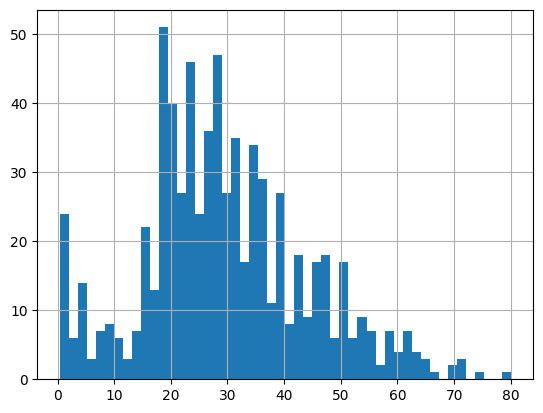

In [19]:
df.Age.hist(bins = 50)

In [20]:
extreme = int(df.Age.mean()+3*df.Age.std())

<AxesSubplot: xlabel='Age'>

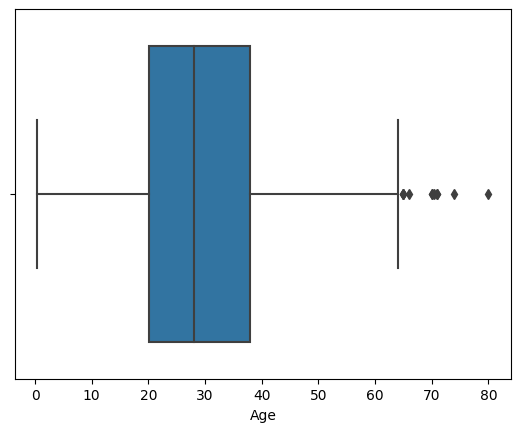

In [21]:
import seaborn as sns
sns.boxplot(data=df,x='Age')

In [22]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [23]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [24]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,28.0,8.4583,73.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


<AxesSubplot: >

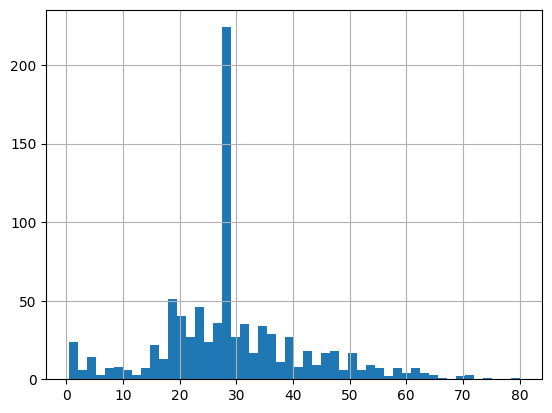

In [25]:
df.Age.hist(bins=50)

<AxesSubplot: >

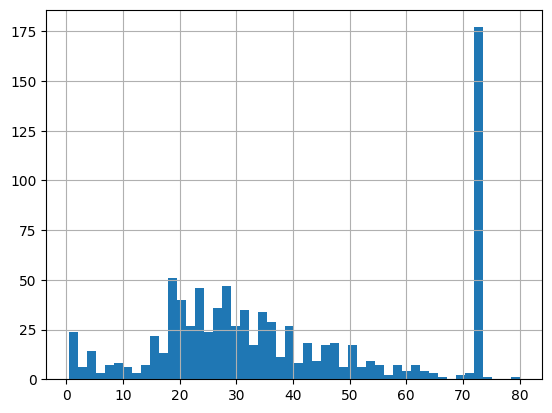

In [26]:
df.Age_end_distribution.hist(bins=50)

<AxesSubplot: xlabel='Age_end_distribution'>

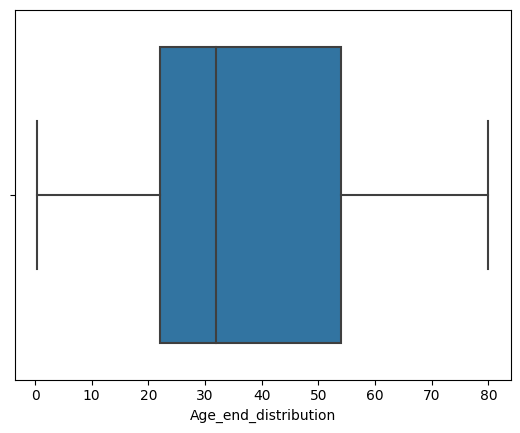

In [27]:
sns.boxplot(data=df,x='Age_end_distribution')

<AxesSubplot: xlabel='Age'>

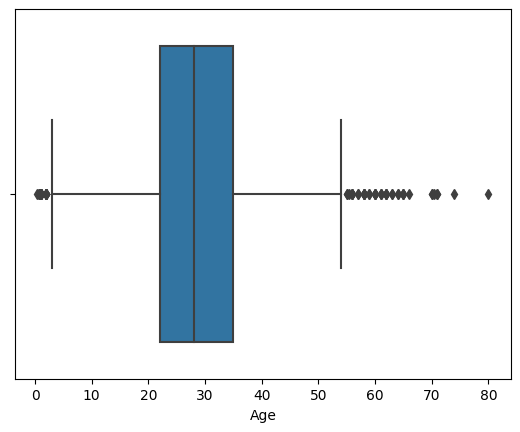

In [28]:
sns.boxplot(data=df,x='Age')